In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import math

# Loading the data

In [3]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

# Data exploration

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


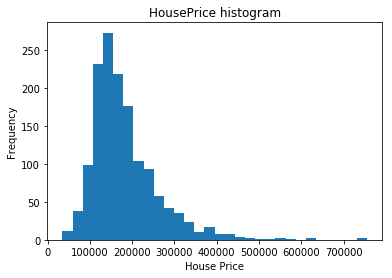

In [5]:
plt.hist(df_train['SalePrice'],  bins = 30)
plt.title('HousePrice histogram')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

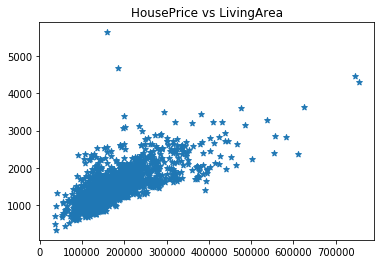

In [6]:
fig, ax=plt.subplots()
ax.scatter(df_train['SalePrice'],df_train['GrLivArea'], marker='*')
plt.title('HousePrice vs LivingArea')
plt.show()

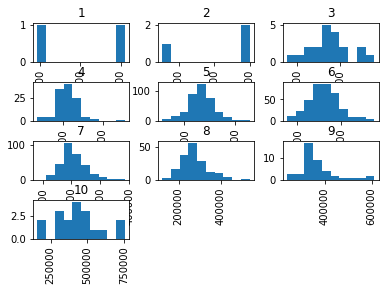

In [7]:
df_train['SalePrice'].hist(by=df_train['OverallQual'])
plt.show()

In [12]:
df_train.groupby(["OverallQual"]).agg({'Id': ['count'], 'SalePrice':['min','mean','max']})

Id SalePrice                       
            count       min           mean     max
OverallQual                                       
1               2     39300   50150.000000   61000
2               3     35311   51770.333333   60000
3              20     37900   87473.750000  139600
4             116     34900  108420.655172  256000
5             397     55993  133523.347607  228950
6             374     76000  161603.034759  277000
7             319     82500  207716.423197  383970
8             168    122000  274735.535714  538000
9              43    239000  367513.023256  611657
10             18    160000  438588.388889  755000

# Feature engineering

Creating a dataframe for only numerical features

In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerics_train = df_train.select_dtypes(include=numerics) 
df_numerics_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# Regression model - Benchmark

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df_numerics_train[['LotArea', 'GrLivArea']]
lm.fit(X,df_train.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

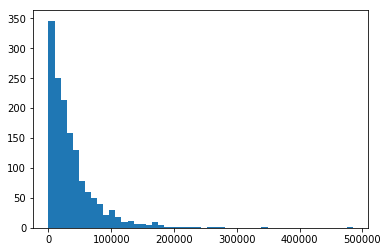

In [95]:
predict_price = np.array(lm.predict(X))
diff = abs(df_train.SalePrice - predict_price)
plt.hist(diff, bins=50)
plt.show()

In [113]:
Y = df_test[['LotArea', 'GrLivArea']]
predict_price_test = lm.predict(Y)
submit_table = pd.DataFrame(data=[df_test.Id, predict_price_test]).T
submit_table = submit_table.astype(np.int64)
submit_table.columns = ['Id', 'SalePrice']
submit_table.head()

,Id,SalePrice
0,1461,117338
1,1462,164043
2,1463,194901
3,1464,189756
4,1465,152826


In [115]:
submit_table.to_csv('Data/submit.csv', sep = ',', index = False)